In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gower
import seaborn as sns
import japanize_matplotlib
import matplotlib.cm as cm
from copy import copy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import DBSCAN

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Input, Embedding, Flatten

In [78]:
def sound():
    !rundll32 user32.dll,MessageBeep

In [190]:
suumo = pd.read_csv('./data/csv/SuumoDetailsFinal20221108.csv')

In [3]:
# suumoを使いまわすための複製
suumo_decom,suumo_docomo = train_test_split(suumo,train_size=1000,shuffle=True,random_state=0)

# 変数分岐
quantity_features = [
    '家賃',  # 目的変数
    '皇居からの距離',
#    '歩',
#    'バス',
#    '車',
    '最寄駅からの距離',
#    '部屋数',
    '面積',
    '築年数',
    '階数',
#    '地下',
#    '地上',
#    '階',
    'オプション数',
#    '駐車場距離',
#    '駐車場料金',
    '条件数',
]
category_features = [
    '市区町村',
#    '路線',
#    '駅',
    '間取り',
    '向き',
    '建物種別',
    '構造',
    '入居',
#    '取引態様',
]
is_features = [
    '間取り_S',
    '間取り_L',
    '間取り_D',
    '間取り_K',
    '駐車場有無',
]

features = np.r_[
    quantity_features,
    category_features,
#    is_features,
]

In [4]:
# 家賃を対数変換
suumo_decom['家賃'] = np.log10(suumo_decom['家賃'])

In [5]:
# 標準化
ss = StandardScaler()
suumo_decom_ss = copy(suumo_decom)
suumo_decom_ss[quantity_features] = ss.fit_transform(suumo_decom[quantity_features])
# Gower
suumo_gower = gower.gower_matrix(suumo_decom[features])

# UMAP→DBSCAN

In [118]:
# UMAP
umap = UMAP(random_state=0)
suumo_umap = umap.fit_transform(suumo_gower)

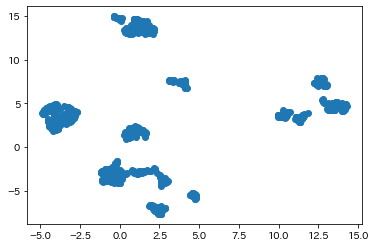

In [119]:
plt.scatter(suumo_umap[:,0],suumo_umap[:,1])
plt.show()

In [120]:
DB = DBSCAN(eps=1.0, min_samples=5)
cluster = DB.fit_predict(suumo_umap)

In [121]:
suumo_decom['クラスタ'] = cluster

In [122]:
suumo_decom['クラスタ'].value_counts()

4    197
3    195
0    154
7     85
6     82
1     80
5     64
2     56
8     55
9     32
Name: クラスタ, dtype: int64

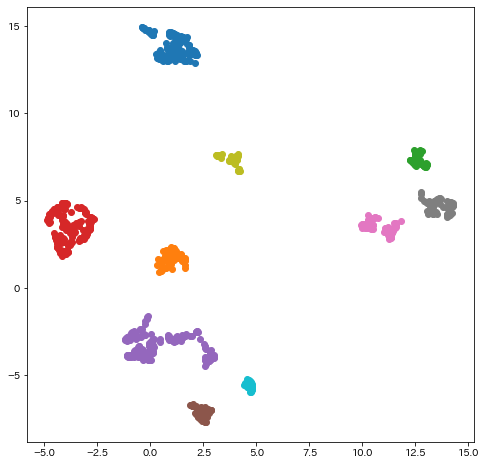

In [123]:
plt.figure(figsize=(8,8))
for cluster in suumo_decom['クラスタ'].unique():
    condition = suumo_decom['クラスタ'] == cluster
    plt.scatter(suumo_umap[condition,0],suumo_umap[condition,1])

plt.show()

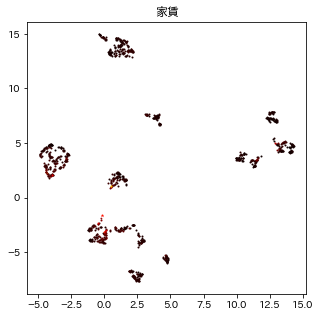

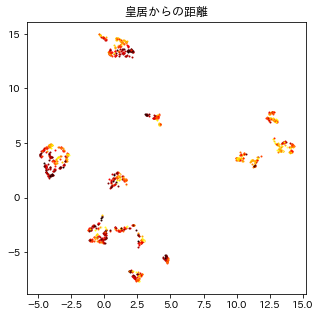

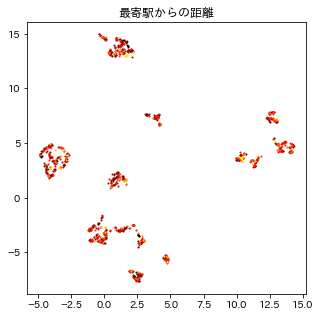

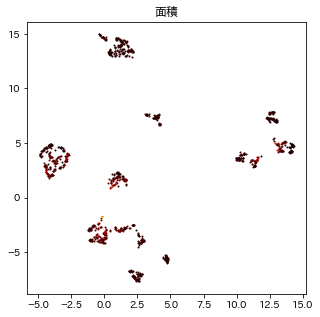

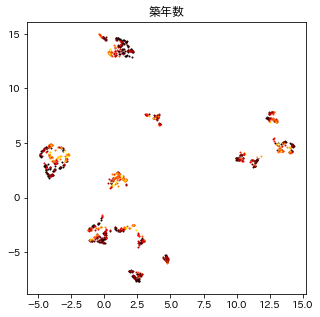

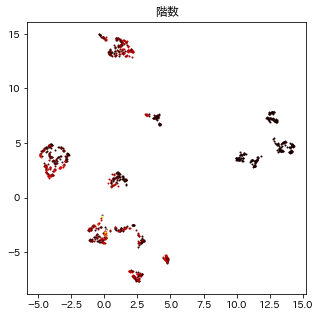

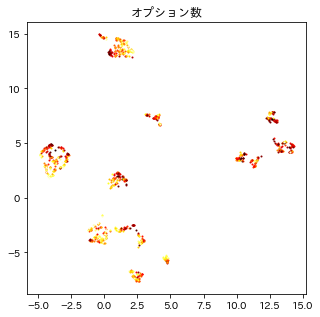

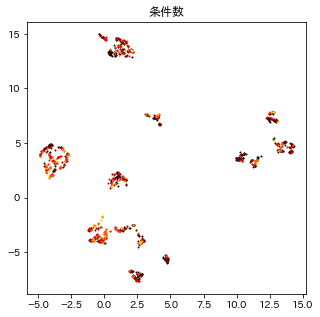

In [130]:
# 量的変数全部見る
for feature in quantity_features:

    min_ = suumo_decom[feature].min()
    max_ = suumo_decom[feature].max()
    scale = max_-min_

    plt.figure(figsize=(5,5))
    for value in suumo_decom[feature].unique():
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_umap[condition,0],
            suumo_umap[condition,1],
            color = cm.hot((value-min_)/scale),
            s = 1
        )
    plt.title(feature)
    plt.show()

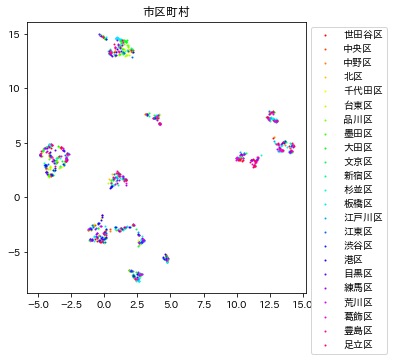

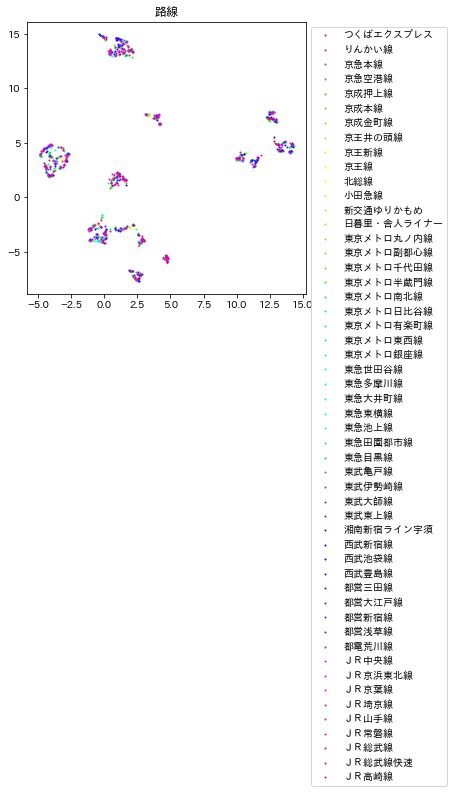

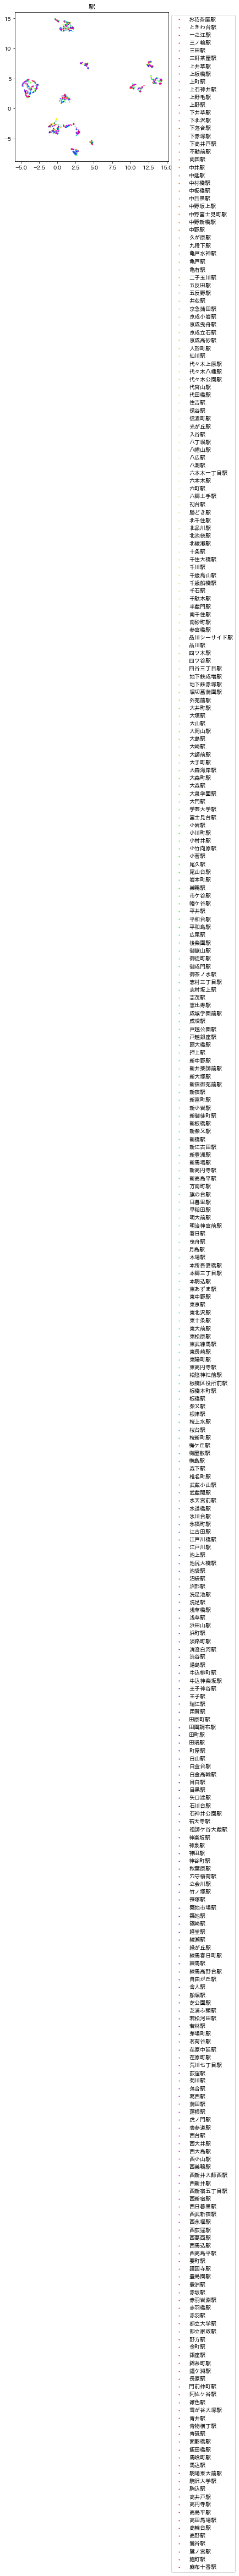

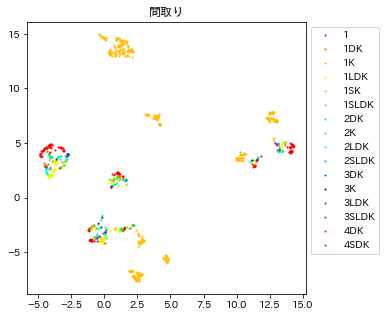

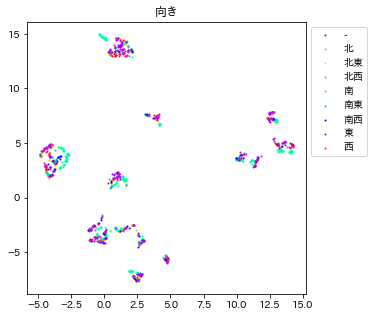

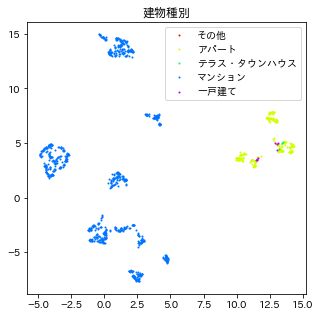

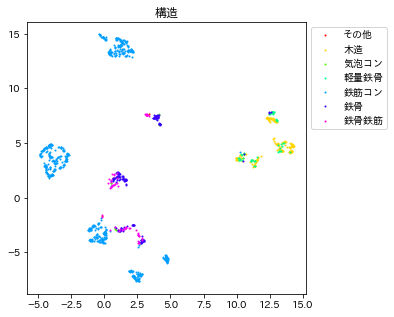

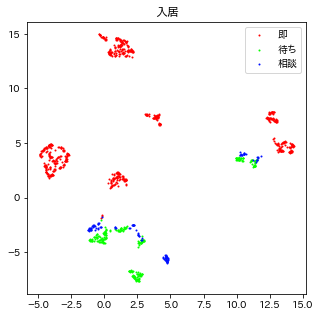

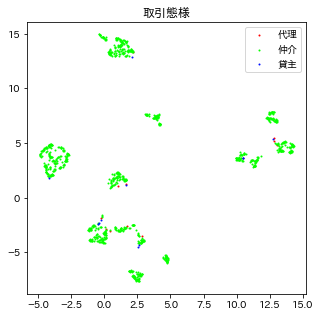

In [131]:
# カテゴリ全部見る
for feature in category_features:

    order = sorted(suumo_decom[feature].unique())
    number = len(suumo_decom[feature].unique())
    plt.figure(figsize=(5,5))
    for num, value in enumerate(order):
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_umap[condition,0],
            suumo_umap[condition,1],
            color = cm.hsv(num/number),
            s = 1
        )
    plt.legend(order,bbox_to_anchor=(1,1))
    plt.title(feature)
    plt.show()

# PCA

In [176]:
pca = PCA(n_components=2,random_state=0)
suumo_pca = pca.fit_transform(suumo_gower)

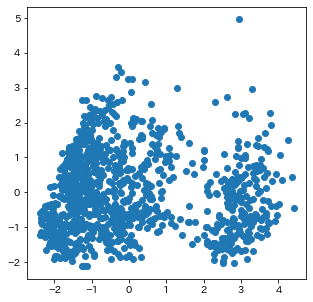

In [177]:
plt.figure(figsize=(5,5))
plt.scatter(suumo_pca[:,0],suumo_pca[:,1])
plt.show()

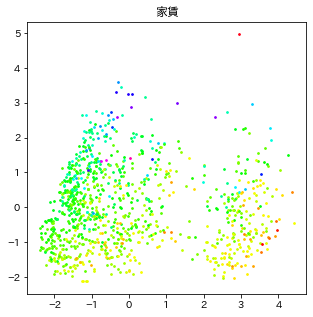

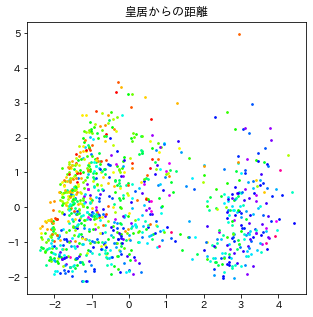

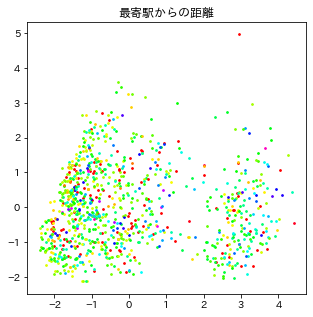

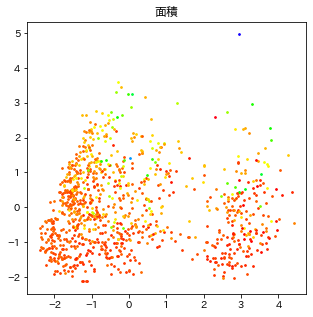

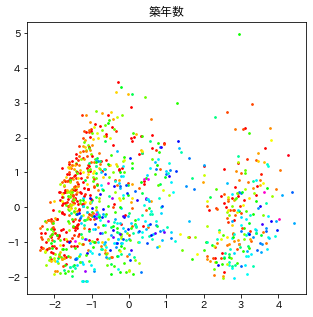

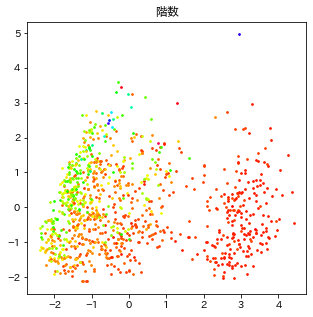

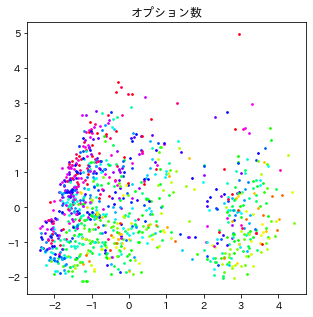

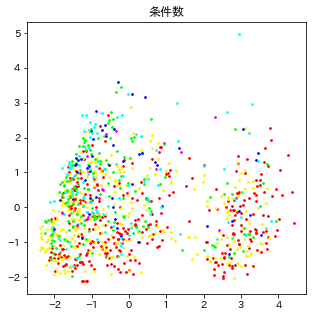

In [178]:
# 量的変数全部見る
for feature in quantity_features:

    min_ = suumo_decom[feature].min()
    max_ = suumo_decom[feature].max()
    scale = max_-min_

    plt.figure(figsize=(5,5))
    for value in suumo_decom[feature].unique():
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_pca[condition,0],
            suumo_pca[condition,1],
            color = cm.hsv((value-min_)/scale),
            s = 3
        )
    plt.title(feature)
    plt.show()

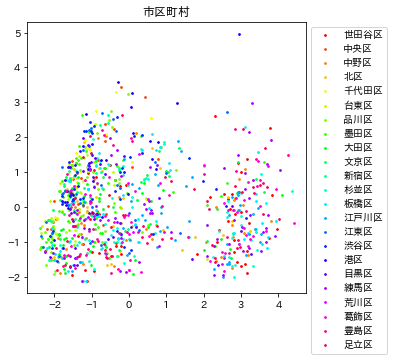

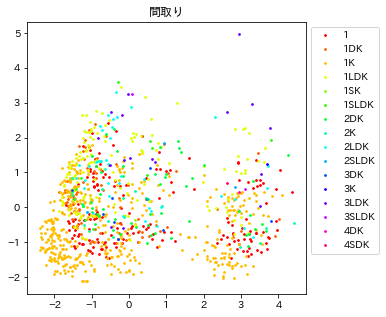

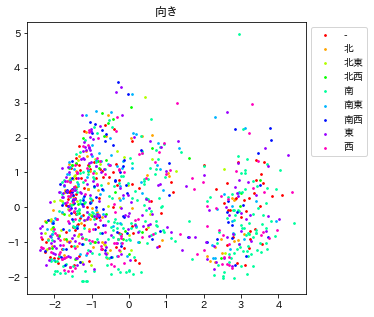

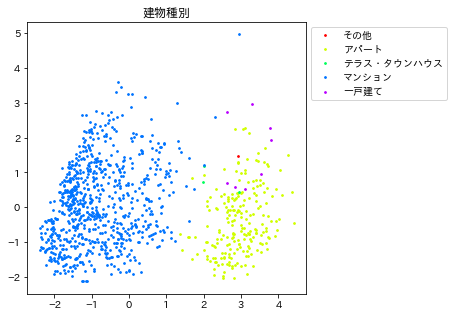

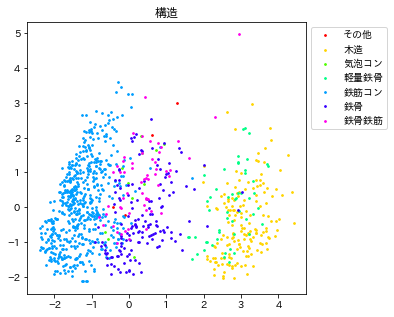

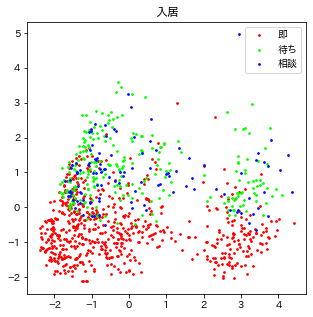

In [179]:
# カテゴリ全部見る
for feature in category_features:

    order = sorted(suumo_decom[feature].unique())
    number = len(suumo_decom[feature].unique())
    plt.figure(figsize=(5,5))
    for num, value in enumerate(order):
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_pca[condition,0],
            suumo_pca[condition,1],
            color = cm.hsv(num/number),
            s = 3
        )
    plt.legend(order,bbox_to_anchor=(1,1))
    plt.title(feature)
    plt.show()

In [180]:
pca_ss = PCA(n_components=2, random_state=0)
suumo_pca_ss = pca_ss.fit_transform(suumo_decom_ss[quantity_features])

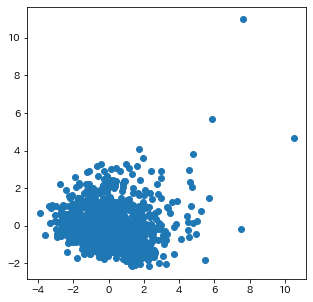

In [181]:
plt.figure(figsize=(5,5))
plt.scatter(suumo_pca_ss[:,0],suumo_pca_ss[:,1])
plt.show()

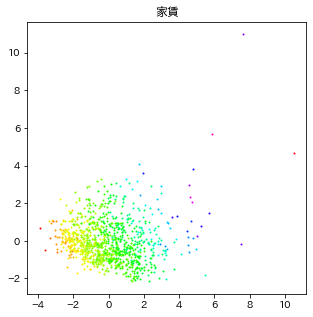

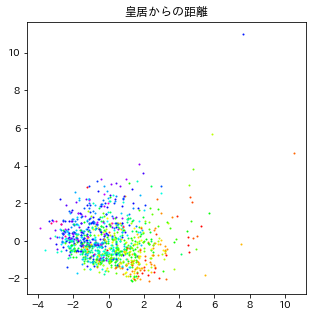

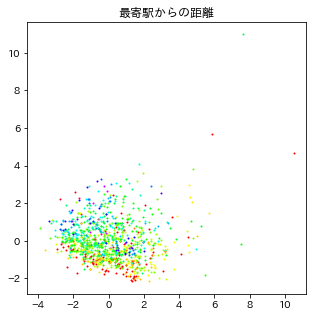

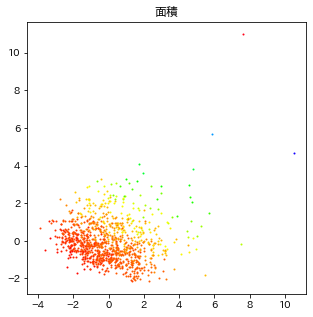

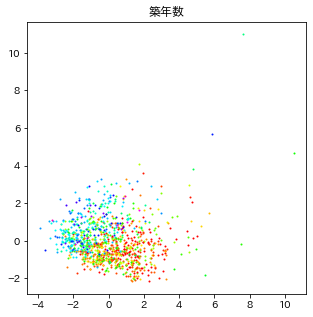

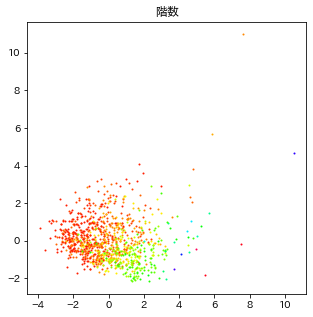

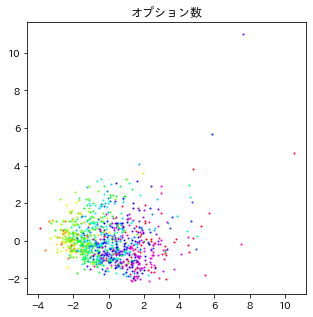

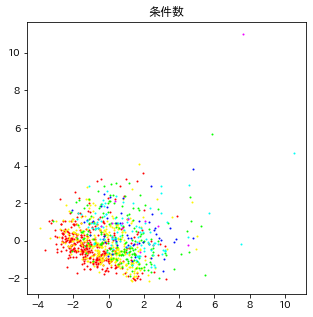

In [182]:
# 量的変数全部見る
for feature in quantity_features:

    min_ = suumo_decom[feature].min()
    max_ = suumo_decom[feature].max()
    scale = max_-min_

    plt.figure(figsize=(5,5))
    for value in suumo_decom[feature].unique():
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_pca_ss[condition,0],
            suumo_pca_ss[condition,1],
            color = cm.hsv((value-min_)/scale),
            s = 1
        )
    plt.title(feature)
    plt.show()

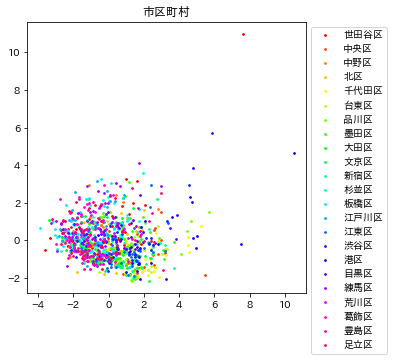

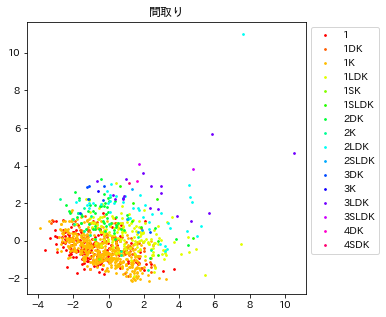

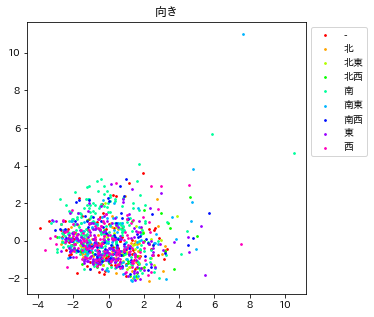

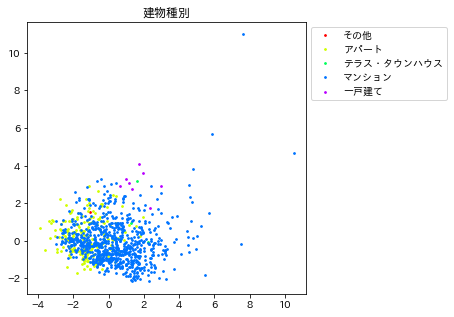

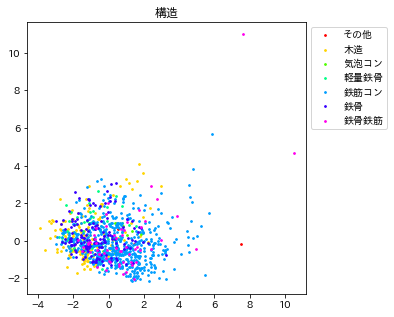

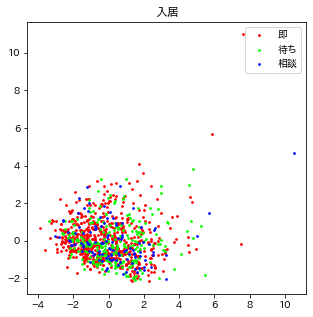

In [183]:
# カテゴリ全部見る
for feature in category_features:

    order = sorted(suumo_decom[feature].unique())
    number = len(suumo_decom[feature].unique())
    plt.figure(figsize=(5,5))
    for num, value in enumerate(order):
        condition = suumo_decom[feature] == value
        plt.scatter(
            suumo_pca_ss[condition,0],
            suumo_pca_ss[condition,1],
            color = cm.hsv(num/number),
            s = 3
        )
    plt.legend(order,bbox_to_anchor=(1,1))
    plt.title(feature)
    plt.show()

# カテゴリ変数をEmbeddingしてみる

In [128]:
# 準備フェイズ


# 事前のデータ加工なし
# 順番をシャッフル
suumo_light = copy(suumo)

# 変数は(だいたい使うであろう皆さんを)全部そのまま使用
quantity_features = [
    '皇居からの距離',
#    '歩', # 13
#    'バス', # 16
#    '車', # 2
    '最寄駅からの距離',
#    '部屋数', # 4
    '面積',
    '築年数',
#    '階数', # 5
#    '地下', # 17
    '地上',
    '階',
#    'オプション数', # 0
#    '駐車場距離', # 14
#    '駐車場料金', # 6
#    '条件数', # 9
]
category_features = [
    '市区町村',
    '路線',
    '駅',
    '間取り',
#    '向き', # 1
    '建物種別', # 10
    '構造',
#    '入居', # 15
#    '取引態様',
]
is_features = [
#    '間取り_S', # 11
#    '間取り_L', # 7
#    '間取り_D', # 12
#    '間取り_K', # 3
#    '駐車場有無', # 8
]
target_feature = '家賃'
features = np.r_[quantity_features,category_features,is_features]


In [130]:
# 家賃を対数変換
suumo_light['家賃'] = np.log10(suumo_light['家賃'])

In [132]:
# カテゴリ変数をEmbeddingしたい
# ラベルエンコード

LE = LabelEncoder()
for feature in category_features:
    suumo_light[feature] = LE.fit_transform(suumo_light[feature])
    # ラベル対応表も作っておく
    num = np.arange(suumo_light[feature].unique().shape[0])
    name = LE.inverse_transform(num)
    exec(f"table_{feature} = pd.DataFrame(np.c_[num,name],columns=['num','name'])")

In [133]:
# Embedding層の適用
# どうやらEmbeddingはスケールが小さすぎるらしいぞ
category_features_embedding = []
for feature in category_features:
    input_dim = suumo_light[feature].shape[0]
    output_dim = 2

    exec(f"Embedding_{feature} = Sequential([Input(shape=(1,)),Embedding(input_dim=input_dim, output_dim=output_dim),Flatten()])")
    exec(f"suumo_light[['{feature}_0','{feature}_1']] = Embedding_{feature}(suumo_light[feature].values)")
    suumo_light.drop(feature, axis=1, inplace=True)
    category_features_embedding.append(f"{feature}_0")
    category_features_embedding.append(f"{feature}_1")
    
features = np.r_[quantity_features,category_features_embedding,is_features]

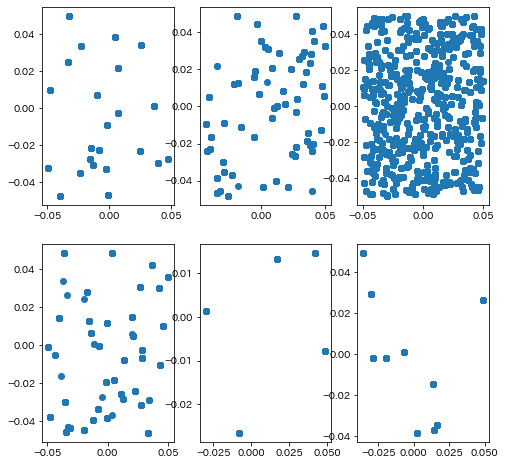

In [153]:
# どうやらスケールが小さいらしい
all_ = len(category_features)
ncols = 3
nrows = int(all_/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,8))
for num, feature in enumerate(category_features):
    row = int(num / ncols)
    col = num % ncols
    axes[row,col].scatter(suumo_light[f"{feature}_0"],suumo_light[f"{feature}_1"])

plt.show()

In [154]:
# 標準化
ss = StandardScaler()
suumo_light[features] = ss.fit_transform(suumo_light[features])

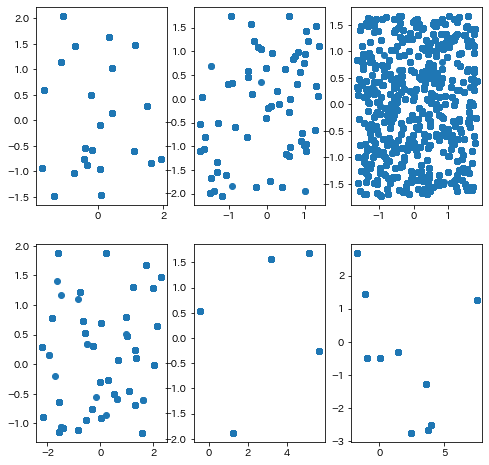

In [156]:
# 標準化しても配置はわらないゾ

all_ = len(category_features)
ncols = 3
nrows = int(all_/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,8))
for num, feature in enumerate(category_features):
    row = int(num / ncols)
    col = num % ncols
    axes[row,col].scatter(suumo_light[f"{feature}_0"],suumo_light[f"{feature}_1"])

plt.show()

In [157]:
# UMAP

# UMAPが内部で行っているspectral_embeddingがデータ間行列を作るから結局クッソ重いぞ
# 10000で1分くらい
umap = UMAP(random_state = 0)
suumo_light_umap = umap.fit_transform(suumo_light.loc[:9999,features])

In [158]:
suumo_light_umap

array([[ 14.5896635,   3.7988038],
       [ 13.747058 ,   2.1402109],
       [ 15.076633 ,   3.1448612],
       ...,
       [-10.922484 , -11.425746 ],
       [ -6.575982 ,  -1.8731678],
       [ -6.600243 ,  -2.0325975]], dtype=float32)

In [159]:
sound()

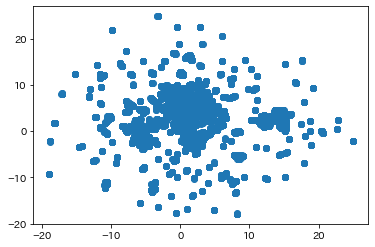

In [160]:
plt.scatter(suumo_light_umap[:,0],suumo_light_umap[:,1])
plt.show()

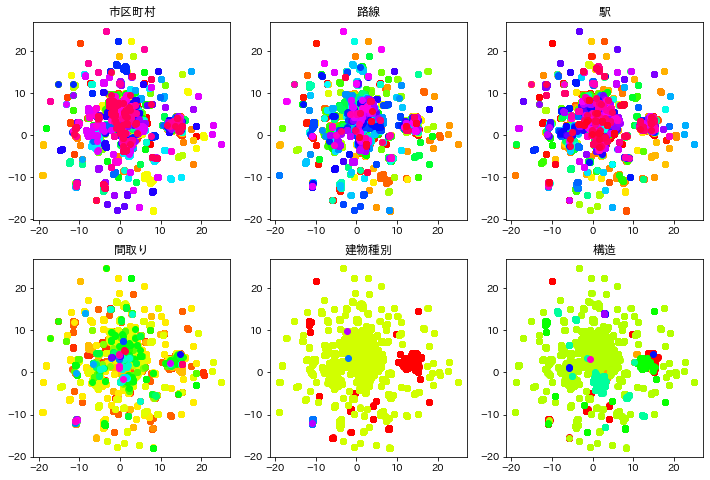

In [177]:
# カテゴリごとの偏りは？
all_ = len(category_features)
ncols = 3
nrows = int(all_/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8))
for num, feature in enumerate(category_features):
    row = int(num / ncols)
    col = num % ncols

    all_num = len(suumo.loc[:9999,feature].unique())
    for order, value in enumerate(suumo.loc[:9999,feature].unique()):
        condition = suumo.loc[:9999,feature] == value
        axes[row,col].scatter(
            suumo_light_umap[condition,0],
            suumo_light_umap[condition,1],
            color = cm.hsv(order/all_num)
        )
    axes[row,col].set_title(feature)
plt.show()

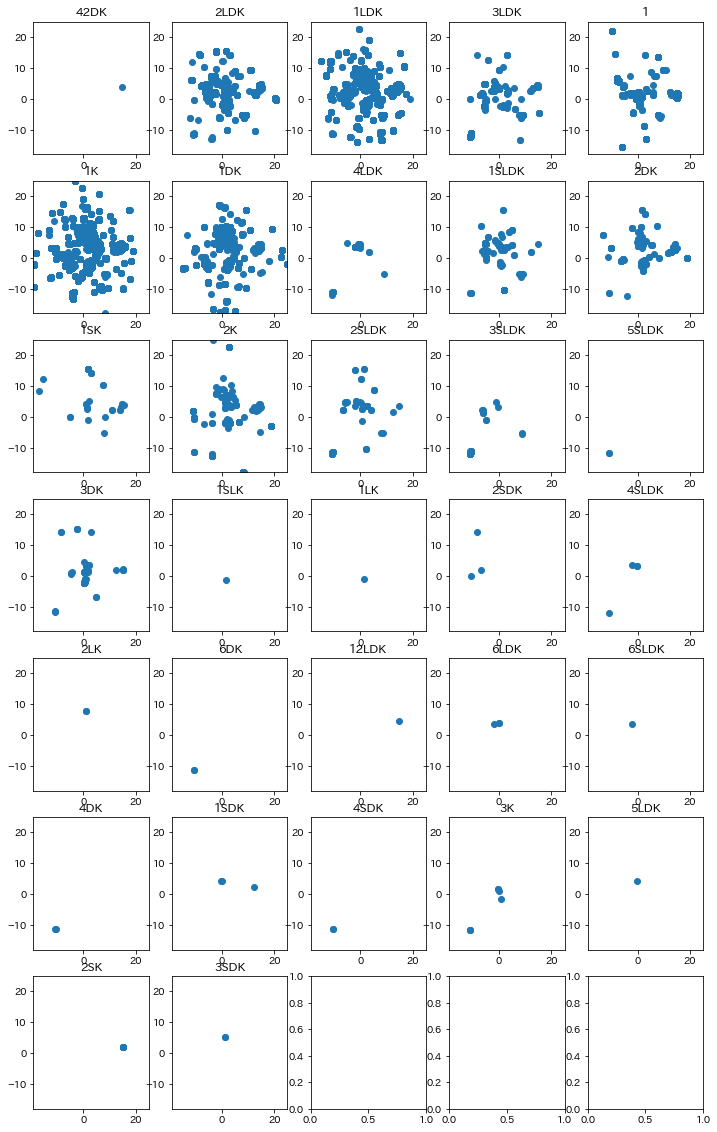

In [174]:
feature = '間取り'

all_ = len(suumo.loc[:9999,feature].unique())
ncols = 5
nrows = int(all_/ncols) + 1
max_x = suumo_light_umap[:,0].max()
min_x = suumo_light_umap[:,0].min()
max_y = suumo_light_umap[:,1].max()
min_y = suumo_light_umap[:,1].min()

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,20))
for num, value in enumerate(suumo.loc[:9999,feature].unique()):
    row = int(num / ncols)
    col = num % ncols

    condition = suumo.loc[:9999,feature] == value
    axes[row,col].scatter(
        suumo_light_umap[condition,0],
        suumo_light_umap[condition,1]
    )
    axes[row,col].set_title(value)
    axes[row,col].set_xlim(min_x,max_x)
    axes[row,col].set_ylim(min_y,max_y)
    
plt.show()

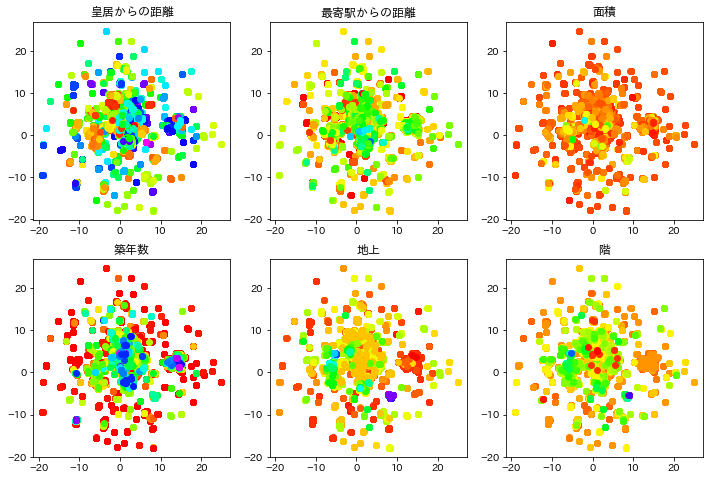

In [179]:
# カテゴリごとの偏りは？
all_ = len(quantity_features)
ncols = 3
nrows = int(all_/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8))
for num, feature in enumerate(quantity_features):
    row = int(num / ncols)
    col = num % ncols

    min_ = suumo.loc[:9999,feature].min()
    max_ = suumo.loc[:9999,feature].max()
    scale = max_ - min_
    for value in suumo.loc[:9999,feature].unique():
        condition = suumo.loc[:9999,feature] == value
        axes[row,col].scatter(
            suumo_light_umap[condition,0],
            suumo_light_umap[condition,1],
            color = cm.hsv((value-min_)/scale)
        )
    axes[row,col].set_title(feature)
plt.show()

In [180]:
sound()

In [191]:
# UMAPくん！？
suumo_ss = copy(suumo)
suumo_ss[quantity_features] = ss.fit_transform(suumo[quantity_features])

In [195]:

umap_ss = UMAP(random_state = 0)
suumo_umap_ss = umap_ss.fit_transform(suumo_ss.loc[:9999,quantity_features])

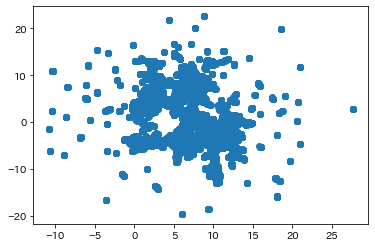

In [197]:
plt.scatter(suumo_umap_ss[:,0],suumo_umap_ss[:,1])
plt.show()

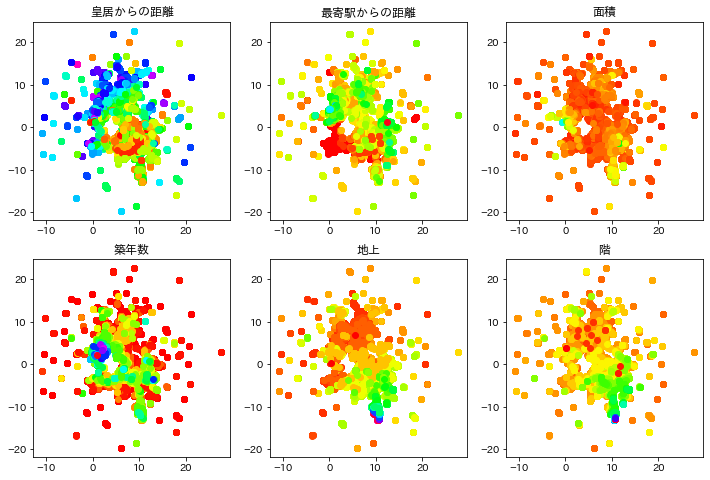

In [199]:
# カテゴリごとの偏りは？
all_ = len(quantity_features)
ncols = 3
nrows = int(all_/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8))
for num, feature in enumerate(quantity_features):
    row = int(num / ncols)
    col = num % ncols

    min_ = suumo.loc[:9999,feature].min()
    max_ = suumo.loc[:9999,feature].max()
    scale = max_ - min_
    for value in suumo.loc[:9999,feature].unique():
        condition = suumo.loc[:9999,feature] == value
        axes[row,col].scatter(
            suumo_umap_ss[condition,0],
            suumo_umap_ss[condition,1],
            color = cm.hsv((value-min_)/scale)
        )
    axes[row,col].set_title(feature)
plt.show()